#Import Package

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

numpy version :  1.21.6
pandas version :  1.3.5
seaborn version :  0.11.2


In [ ]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

#Load Dataset

In [ ]:
df = pd.read_csv('flight.csv')
df.head(3)

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26


In [ ]:
df.shape

(62988, 23)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

#Data Exploration

In [ ]:
columns = [x for x in df.columns]
percent=[]
for kolom in columns:
    percent.append(round(df[kolom].isnull().sum()/df[kolom].shape[0]*100, 2))

explore = df.describe(percentiles = [], include = 'all').T
explore['missing'] = len(df) - explore['count']
explore['%'] = percent
explore = explore[['missing','%','min','max']]

In [ ]:
explore = explore.replace(np.nan, '-', regex=True)
explore

,missing,%,min,max
MEMBER_NO,0.0,0.00,1.0,62988.0
FFP_DATE,0.0,0.00,-,-
FIRST_FLIGHT_DATE,0.0,0.00,-,-
GENDER,3.0,0.00,-,-
FFP_TIER,0.0,0.00,4.0,6.0
WORK_CITY,2269.0,3.60,-,-
WORK_PROVINCE,3248.0,5.16,-,-
WORK_COUNTRY,26.0,0.04,-,-
AGE,420.0,0.67,6.0,110.0
LOAD_TIME,0.0,0.00,-,-


####Statistic Descriptive for Numerical Data
Performing statistic descriptive for all numerical data exclude MEMBER_NO column, since it is not needed for our analysis.

In [ ]:
#Statistic descriptive for numerical data (excld `MEMBER_NO`)
df.drop(['MEMBER_NO'],axis=1).describe()

,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
count,62988.000000,62568.000000,62988.000000,62988.000000,62437.000000,62850.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.0000,62988.000000
mean,4.102162,42.476346,11.839414,10925.081254,5355.376064,5604.026014,17123.878691,176.120102,67.749788,166.033895,0.319775,0.721558,12545.7771,2.728155
std,0.373856,9.885915,14.049471,16339.486151,8109.450147,8703.364247,20960.844623,183.822223,77.517866,123.397180,1.136004,0.185427,20507.8167,7.364164
min,4.000000,6.000000,2.000000,0.000000,0.000000,0.000000,368.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
25%,4.000000,35.000000,3.000000,2518.000000,1003.000000,780.000000,4747.000000,29.000000,23.370370,79.000000,0.000000,0.611997,2775.0000,0.000000
50%,4.000000,41.000000,7.000000,5700.000000,2800.000000,2773.000000,9994.000000,108.000000,44.666667,143.000000,0.000000,0.711856,6328.5000,0.000000
75%,4.000000,48.000000,15.000000,12831.000000,6574.000000,6845.750000,21271.250000,268.000000,82.000000,228.000000,0.000000,0.809476,14302.5000,1.000000
max,6.000000,110.000000,213.000000,505308.000000,239560.000000,234188.000000,580717.000000,731.000000,728.000000,728.000000,46.000000,1.500000,985572.0000,140.000000


####Correlation Matrix
In order to understand some variables/features that correlated each other, the correlation matrix is shown.

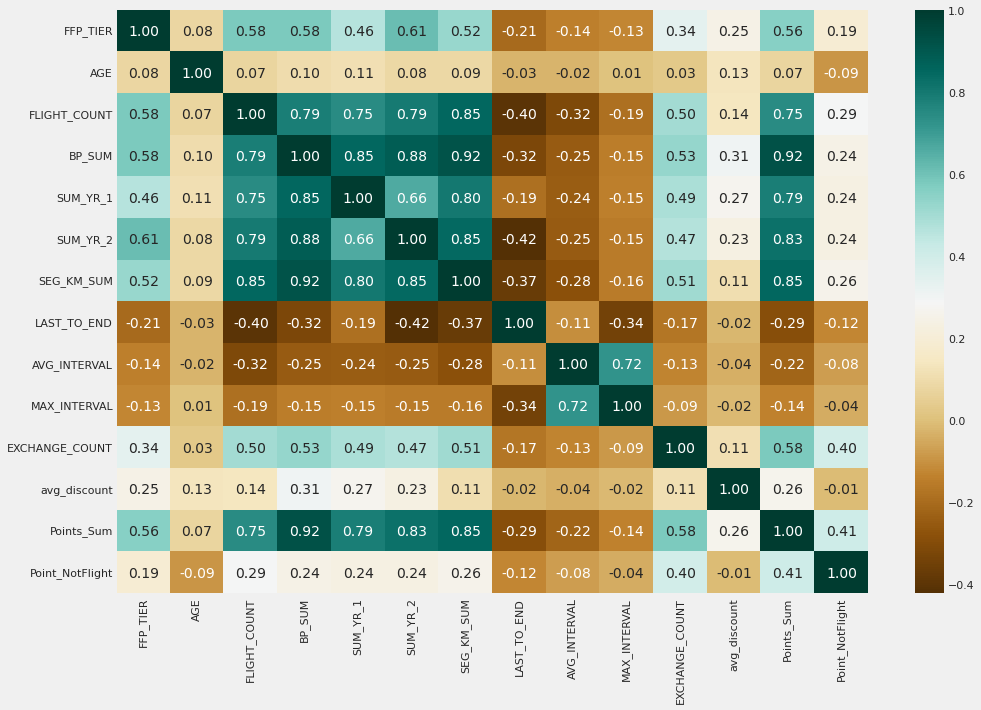

In [ ]:
#Adjust the figure size for better readability
plt.figure(figsize=(15,10))

#Plot the heatmap
correlation = df.drop(['MEMBER_NO'],axis=1).corr()
sns.heatmap(correlation, annot=True, cmap='BrBG', fmt='.2f')

From the correlation heatmap above, It can be seen that there are some features that have a high correlation with other features, such as:

FLIGHT_COUNT (Number of Customer Flights)

BP_SUM (Travel Plans)

SUM_YR_1 (Fares Revenue)

SUM_YR_2 (Votes Prices)

SEG_KM_SUM (Total Distance (Km) Flights that have been done)

Points_Sum (The Total Points that Earned by Customer)

#Data Preprocessing

###Feature Selection based on LRFMC Model


####Attribute reduction



There are too many attributes in the flight.csv dataset. To assess customers, the most widely used RFM model (R) current consumption time interval, (F) consumption frequency, (M) total consumption identified.
Judging from the existing features, based on the variety of airline ticket prices, different customers with the same amount of spending on the airline can mean different values. For example, a passenger who purchases a low-class ticket with a longer route is naturally more valuable to the airline than a passenger who buys a high-class ticket with a short route. Therefore, we replace the consumption amount (M) with the flight mileage M-(KM) and the discount coefficient (C), and add the airline relationship duration feature (how long you have been on the airline) LENGTH, which represents the time to join the airline program. Therefore, we modified the RFM model to be the LRFMC model.

According to the LRFMC model of airline customer values, 6 attributes related to the LRFMC model index were selected, namely `FFP_DATE`, `LOAD_TIME`, `FLIGHT_COUNT`, `avg_discount`, `SEG_KM_SUM`, dan `LAST_TO_END`.

####Data Transformation

EDA will focus on RFM features.

* `L` (Length Relation)
The length of time the customer has been in contact with the airline company, this value can be obtained from `LOAD_TIME` (the time the data was last saved) - (deducted) `FFP_DATE` (the customer is registered in the airline program it).

* `R` (Recency)
The latest or last time the customer used the airline.

* `F` (Frequency)
The level of frequency/how many times the customer has used the airline.

* `M` (Monetary Value)
Total distance traveled.

* `C` (Coefficient Value)
The coefficient of the average discount that customers get.

####Handling Duplicated Value

In [ ]:
df[df.duplicated()==True]

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight


Length (`FFP_DATE` - `LOAD_TIME`)

In [ ]:
df[['FFP_DATE','LOAD_TIME']].dtypes

FFP_DATE     object
LOAD_TIME    object
dtype: object

In [ ]:
#Change data type object to datetime
df['FFP_DATE']=pd.to_datetime(df['FFP_DATE'])
df['LOAD_TIME']=pd.to_datetime(df['LOAD_TIME'])

In [ ]:
df[['FFP_DATE','LOAD_TIME']].dtypes

FFP_DATE     datetime64[ns]
LOAD_TIME    datetime64[ns]
dtype: object

In [ ]:
from datetime import datetime
def interval_time(dd):
    return dd.days

df['LENGTH']=np.abs(df['LOAD_TIME'] - df['FFP_DATE'])
df['LENGTH']=df['LENGTH'].apply(interval_time)

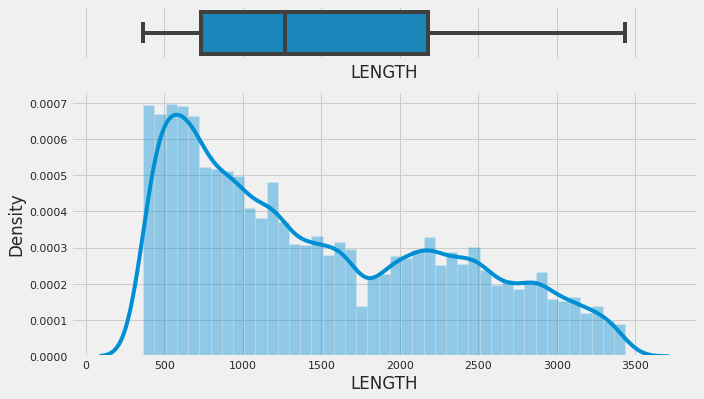

In [ ]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)},figsize=(10,6))
sns.boxplot(df['LENGTH'], ax=ax_box)
sns.distplot(df['LENGTH'], ax=ax_hist)
plt.show()

Recency (`LAST_TO_END`)

In [ ]:
df['LAST_TO_END'].describe()

count    62988.000000
mean       176.120102
std        183.822223
min          1.000000
25%         29.000000
50%        108.000000
75%        268.000000
max        731.000000
Name: LAST_TO_END, dtype: float64

In [ ]:
df['LAST_TO_END'].isnull().value_counts()

False    62988
Name: LAST_TO_END, dtype: int64

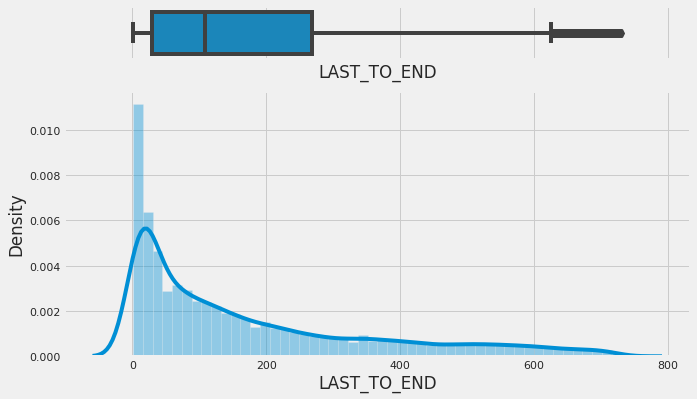

In [ ]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)},figsize=(10,6))
sns.boxplot(df['LAST_TO_END'], ax=ax_box)
sns.distplot(df['LAST_TO_END'], ax=ax_hist)
plt.show()

Frequency (`FLIGHT_COUNT`)

In [ ]:
df['FLIGHT_COUNT'].describe()

count    62988.000000
mean        11.839414
std         14.049471
min          2.000000
25%          3.000000
50%          7.000000
75%         15.000000
max        213.000000
Name: FLIGHT_COUNT, dtype: float64

In [ ]:
df['FLIGHT_COUNT'].isnull().value_counts()

False    62988
Name: FLIGHT_COUNT, dtype: int64

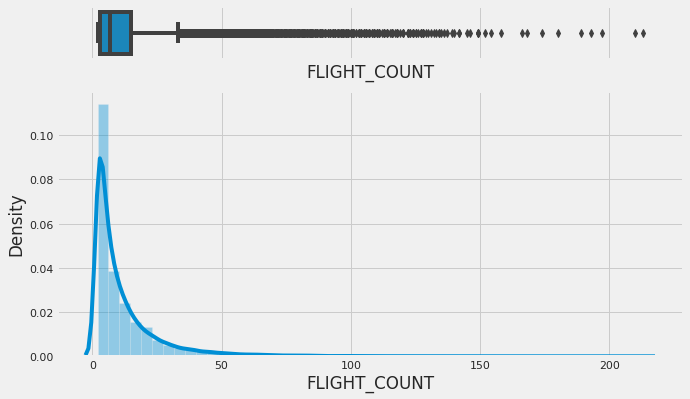

In [ ]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)},figsize=(10,6))
sns.boxplot(df['FLIGHT_COUNT'], ax=ax_box)
sns.distplot(df['FLIGHT_COUNT'], ax=ax_hist)
plt.show()

Monetary (`SEG_KM_SUM`)

In [ ]:
df['SEG_KM_SUM'].describe()

count     62988.000000
mean      17123.878691
std       20960.844623
min         368.000000
25%        4747.000000
50%        9994.000000
75%       21271.250000
max      580717.000000
Name: SEG_KM_SUM, dtype: float64

In [ ]:
df['SEG_KM_SUM'].isnull().value_counts()

False    62988
Name: SEG_KM_SUM, dtype: int64

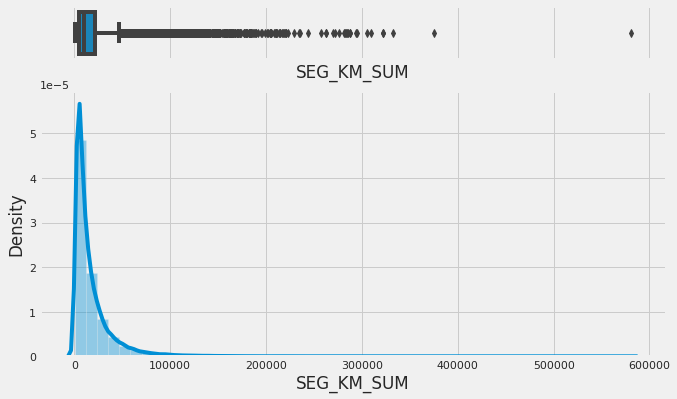

In [ ]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)},figsize=(10,6))
sns.boxplot(df['SEG_KM_SUM'], ax=ax_box)
sns.distplot(df['SEG_KM_SUM'], ax=ax_hist)
plt.show()

Coeficient (`avg_discount`)

In [ ]:
df['avg_discount'].describe()

count    62988.000000
mean         0.721558
std          0.185427
min          0.000000
25%          0.611997
50%          0.711856
75%          0.809476
max          1.500000
Name: avg_discount, dtype: float64

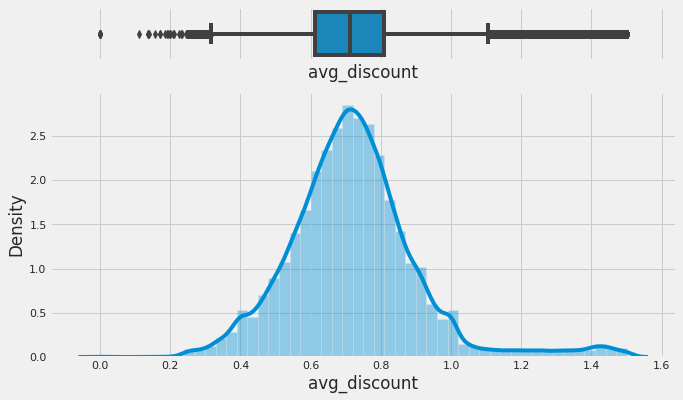

In [ ]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)},figsize=(10,6))
sns.boxplot(df['avg_discount'], ax=ax_box)
sns.distplot(df['avg_discount'], ax=ax_hist)
plt.show()

In [ ]:
df_ = df.copy()

####Selecting LRFMC-compliant attributes to include in the dataset.

In [ ]:
df_lrfmc = df[['MEMBER_NO','LENGTH','LAST_TO_END','FLIGHT_COUNT','SEG_KM_SUM','avg_discount']]
df_lrfmc.columns = ['MEMBER_NO','L','R','F','M','C']
df_lrfmc_drop=df_lrfmc[['L','R','F','M','C']]

We've successfully create the LRFMC features in a dataframe based on original data. This data that will be used further for clustering process to get customer value analysis.

####Handling Missing Value

In [ ]:
df_lrfmc_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   L       62988 non-null  int64  
 1   R       62988 non-null  int64  
 2   F       62988 non-null  int64  
 3   M       62988 non-null  int64  
 4   C       62988 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 2.4 MB


There's no missing value in the LRFMC dataset

In [ ]:
df_lrfmc_drop.head()

,L,R,F,M,C
0,2706,1,210,580717,0.961639
1,2597,7,140,293678,1.252314
2,2615,11,135,283712,1.254676
3,2047,97,23,281336,1.090870
4,1816,5,152,309928,0.970658


In [ ]:
df_lrfmc_drop.describe()

,L,R,F,M,C
count,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000
mean,1485.000826,176.120102,11.839414,17123.878691,0.721558
std,847.222941,183.822223,14.049471,20960.844623,0.185427
min,365.000000,1.000000,2.000000,368.000000,0.000000
25%,732.000000,29.000000,3.000000,4747.000000,0.611997
50%,1270.000000,108.000000,7.000000,9994.000000,0.711856
75%,2179.000000,268.000000,15.000000,21271.250000,0.809476
max,3437.000000,731.000000,213.000000,580717.000000,1.500000


####Outlier Treatment

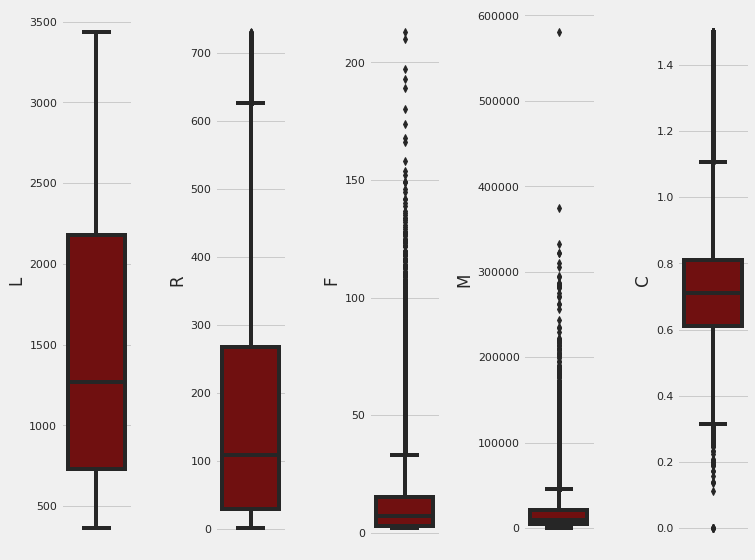

In [ ]:
#Adjust the figure size for better readability
plt.figure(figsize=(15,8))

#Plotting
feat_num = list(df_lrfmc_drop)
for i in range(0, len(feat_num)):
    plt.subplot(1, 7, i+1)
    sns.boxplot(y=df_lrfmc_drop[feat_num[i]],color='maroon', orient='v')
    plt.tight_layout()

Dari grafik distibusi di atas, bisa disimpulkan data banyak outlier hingga distrubusi datanya negatif atau skewness.

Log transformation to reduce outlier

In [ ]:
#Create a dataframe that values are log-transformed

df_log_LRFMC = df_lrfmc_drop.copy()
df_log_LRFMC['L'] = np.log10(df_lrfmc_drop['L'] + 1)
df_log_LRFMC['R'] = np.log10(df_lrfmc_drop['R'] + 1)
df_log_LRFMC['F'] = np.log10(df_lrfmc_drop['F'] + 1)
df_log_LRFMC['M'] = np.log10(df_lrfmc_drop['M'] + 1)
df_log_LRFMC['C'] = np.log10(df_lrfmc_drop['C'] + 1)
df_log_LRFMC

,L,R,F,M,C
0,3.432488,0.301030,2.324282,5.763965,0.292619
1,3.414639,0.903090,2.149219,5.467873,0.352629
2,3.417638,1.079181,2.133539,5.452879,0.353084
3,3.311330,1.991226,1.380211,5.449227,0.320327
4,3.259355,0.778151,2.184691,5.491262,0.294611
...,...,...,...,...,...
62983,3.019947,2.474216,0.477121,3.054996,0.000000
62984,3.171726,1.954243,0.698970,3.904012,0.000000
62985,3.465977,1.477121,0.477121,3.414137,0.000000
62986,2.622214,2.603144,0.477121,3.594945,0.000000


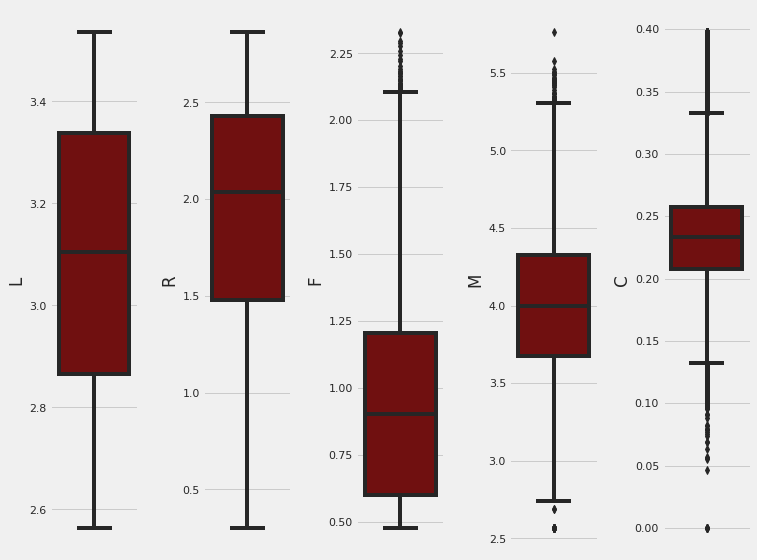

In [ ]:
#Adjust the figure size for better readability
plt.figure(figsize=(15,8))

#Plotting
feat_num = list(df_log_LRFMC)
for i in range(0, len(feat_num)):
    plt.subplot(1, 7, i+1)
    sns.boxplot(y=df_log_LRFMC[feat_num[i]],color='maroon', orient='v')
    plt.tight_layout()

Remove Outlier based on IQR

In [ ]:
df_log_LRFMC.describe()

,L,R,F,M,C
count,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000
mean,3.093789,1.916599,0.940574,4.008851,0.233504
std,0.270118,0.636617,0.362145,0.442821,0.045491
min,2.563481,0.301030,0.477121,2.567026,0.000000
25%,2.865104,1.477121,0.602060,3.676511,0.207364
50%,3.104146,2.037426,0.903090,3.999783,0.233467
75%,3.338456,2.429752,1.204120,4.327813,0.257553
max,3.536306,2.864511,2.330414,5.763965,0.397940


In [ ]:
#Define IQR = Q3 - Q1
IQR = df_log_LRFMC.quantile(0.75) - df_log_LRFMC.quantile(0.25)
#Upper_limit = Q3 + 1.5 * IQR
upper_limit = df_log_LRFMC.quantile(0.75) + 1.5 * IQR
#Lower_limit = Q1 - 1.5 * IQR
lower_limit = df_log_LRFMC.quantile(0.25) - 1.5 * IQR

print(f'Rows before IQR outlier filter: {len(df_log_LRFMC)}')

#Filter data between the limits
df_IQR_LRFMC = df_log_LRFMC.copy()
df_IQR_LRFMC = df_log_LRFMC[(df_log_LRFMC >= lower_limit) & (df_log_LRFMC <= upper_limit)]

#Drop nan data
df_IQR_LRFMC = df_IQR_LRFMC.dropna().reset_index(drop=True)

print('Rows after IQR outlier filter', len(df_IQR_LRFMC))
df_IQR_LRFMC

Rows before IQR outlier filter: 62988
Rows after IQR outlier filter 60063


,L,R,F,M,C
0,3.522966,1.544068,1.397940,5.278328,0.319568
1,3.067815,0.602060,1.556303,5.303503,0.300716
2,3.081707,1.361728,1.342423,5.268330,0.307391
3,2.797268,0.301030,2.045323,5.273207,0.304486
4,3.529045,1.204120,1.748188,5.187151,0.331630
...,...,...,...,...,...
60058,2.642465,2.605305,0.477121,2.873321,0.176091
60059,3.148294,2.675778,0.477121,2.921686,0.146128
60060,2.574031,2.572872,0.477121,2.873321,0.153815
60061,2.724276,2.698101,0.477121,2.881385,0.146128


#####Handling duplicates after reducing outlier

In [ ]:
#Check duplicated value after removing outlier
df_IQR_LRFMC.duplicated().sum()

89

In [ ]:
#Drop duplicated value
df_IQR_LRFMC = df_IQR_LRFMC.drop_duplicates().reset_index(drop=True)
df_IQR_LRFMC

,L,R,F,M,C
0,3.522966,1.544068,1.397940,5.278328,0.319568
1,3.067815,0.602060,1.556303,5.303503,0.300716
2,3.081707,1.361728,1.342423,5.268330,0.307391
3,2.797268,0.301030,2.045323,5.273207,0.304486
4,3.529045,1.204120,1.748188,5.187151,0.331630
...,...,...,...,...,...
59969,2.642465,2.605305,0.477121,2.873321,0.176091
59970,3.148294,2.675778,0.477121,2.921686,0.146128
59971,2.574031,2.572872,0.477121,2.873321,0.153815
59972,2.724276,2.698101,0.477121,2.881385,0.146128


####Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
#Standardize data

std = StandardScaler().fit_transform(df_IQR_LRFMC)
df_std_LRFMC = pd.DataFrame(std, columns = list(df_IQR_LRFMC))
df_std_LRFMC

,L,R,F,M,C
0,1.596519,-0.586495,1.273476,2.900166,2.417048
1,-0.094247,-2.071131,1.716353,2.957794,1.902524
2,-0.042639,-0.873870,1.118216,2.877278,2.084692
3,-1.099257,-2.545564,3.083949,2.888443,2.005413
4,1.619103,-1.122265,2.252981,2.691448,2.746239
...,...,...,...,...,...
59969,-1.674309,1.086049,-1.301688,-2.605242,-1.498794
59970,0.204713,1.197117,-1.301688,-2.494525,-2.316564
59971,-1.928521,1.034933,-1.301688,-2.605242,-2.106771
59972,-1.370402,1.232298,-1.301688,-2.586782,-2.316564


In [ ]:
df_std_LRFMC.head()

,L,R,F,M,C
0,1.596519,-0.586495,1.273476,2.900166,2.417048
1,-0.094247,-2.071131,1.716353,2.957794,1.902524
2,-0.042639,-0.873870,1.118216,2.877278,2.084692
3,-1.099257,-2.545564,3.083949,2.888443,2.005413
4,1.619103,-1.122265,2.252981,2.691448,2.746239


#Modeling and Visualization

####K-MEANS Clustering Model

K-means Clustering is one of the simplest and most popular “unsupervised machine learning algorithms”. The purpose of this algorithm is to find groups in the data, with the number of groups represented by the variable K. Variable K itself is the number of clusters we want.

#####Elbow Method to get best number for K-Means (Inertia)

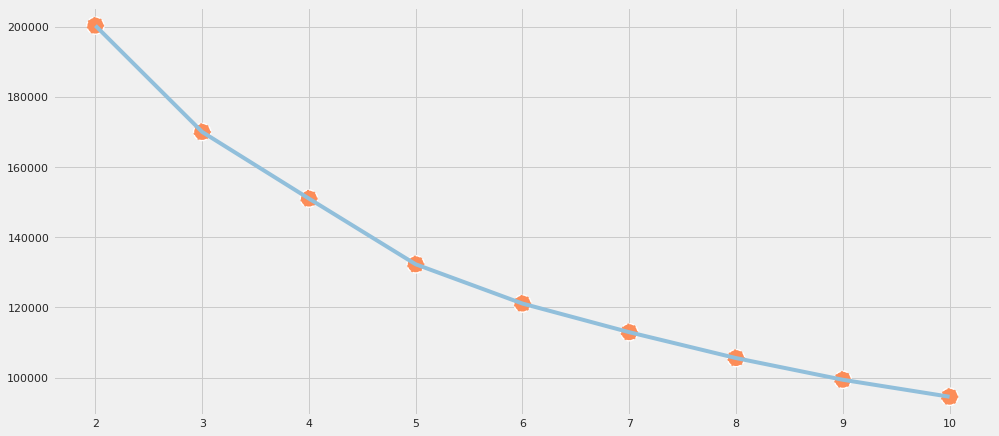

In [ ]:
#Mencari nilai k optimal dengan parameter inertia
from sklearn.cluster import KMeans

inertia = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_std_LRFMC)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(15, 7))

sns.lineplot(x=range(2, 11), y=inertia, color='#91bfdb', linewidth = 4)
sns.scatterplot(x=range(2, 11), y=inertia, s=300, color='#fc8d59',  linestyle='--')
plt.show()

In the graph above, at a glance, the elbow point looks similar to the point k=5. To make sure we will check the value using Silhouette Score.

#####Silhoutte to get best number for K Means

In [ ]:
from sklearn.metrics import silhouette_score

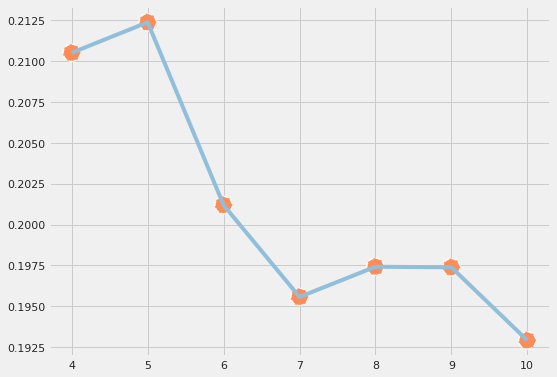

In [ ]:
#Check for 4 to 11 cluster

range_n_clusters = list(range(4,11))
arr_silhouette_score_euclidean = []
for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i).fit(df_std_LRFMC)
    preds = kmeans.predict(df_std_LRFMC)

    score_euclidean = silhouette_score(df_std_LRFMC, preds, metric='euclidean')
    arr_silhouette_score_euclidean.append(score_euclidean)


fig, ax = plt.subplots(figsize=(8, 6))
sns.lineplot(x=range(4,11), y=arr_silhouette_score_euclidean, color='#91bfdb', linewidth = 4)
sns.scatterplot(x=range(4,11), y=arr_silhouette_score_euclidean, s=300, color='#fc8d59',  linestyle='--')
plt.show()

Based on above result, we will go for 5 cluster for the best cluster.

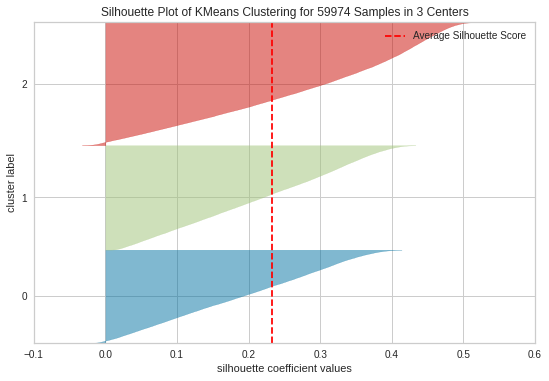

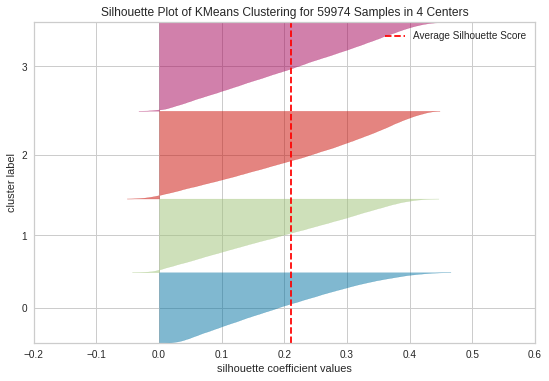

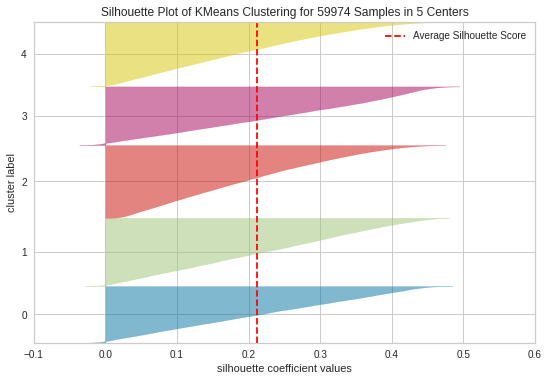

In [ ]:
#Silhouette plot
from yellowbrick.cluster import SilhouetteVisualizer

for i in [3,4,5]:
    model = KMeans(i, random_state=142)
    visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
    visualizer.fit(df_std_LRFMC)
    visualizer.show()

Based on the results of the silhouette plot, to determine the best k value, two factors must be considered, namely the average coefficient is as large as possible, but still smaller than the maximum score of each cluster member and considering cluster thicknesses that are similar to one another, indicating a balanced composition.

Based on consideration of previous analyses, k = 5 was chosen for n-clusters in K-Means analysis.

####K-Means Model

In [ ]:
# Create clusters using K-Means
kmeans = KMeans(n_clusters=5, random_state=0).fit(df_std_LRFMC)

# Assign Cluster
cluster = kmeans.labels_
df_std_LRFMC['K_clusters'] = cluster
df_IQR_LRFMC['K_clusters'] = cluster

# see cluster on data after IQR step
df_IQR_LRFMC.head()

,L,R,F,M,C,K_clusters
0,3.522966,1.544068,1.397940,5.278328,0.319568,2
1,3.067815,0.602060,1.556303,5.303503,0.300716,2
2,3.081707,1.361728,1.342423,5.268330,0.307391,2
3,2.797268,0.301030,2.045323,5.273207,0.304486,2
4,3.529045,1.204120,1.748188,5.187151,0.331630,2


In [ ]:
#See cluster on data after scaling
df_std_LRFMC.head()

,L,R,F,M,C,K_clusters
0,1.596519,-0.586495,1.273476,2.900166,2.417048,2
1,-0.094247,-2.071131,1.716353,2.957794,1.902524,2
2,-0.042639,-0.873870,1.118216,2.877278,2.084692,2
3,-1.099257,-2.545564,3.083949,2.888443,2.005413,2
4,1.619103,-1.122265,2.252981,2.691448,2.746239,2


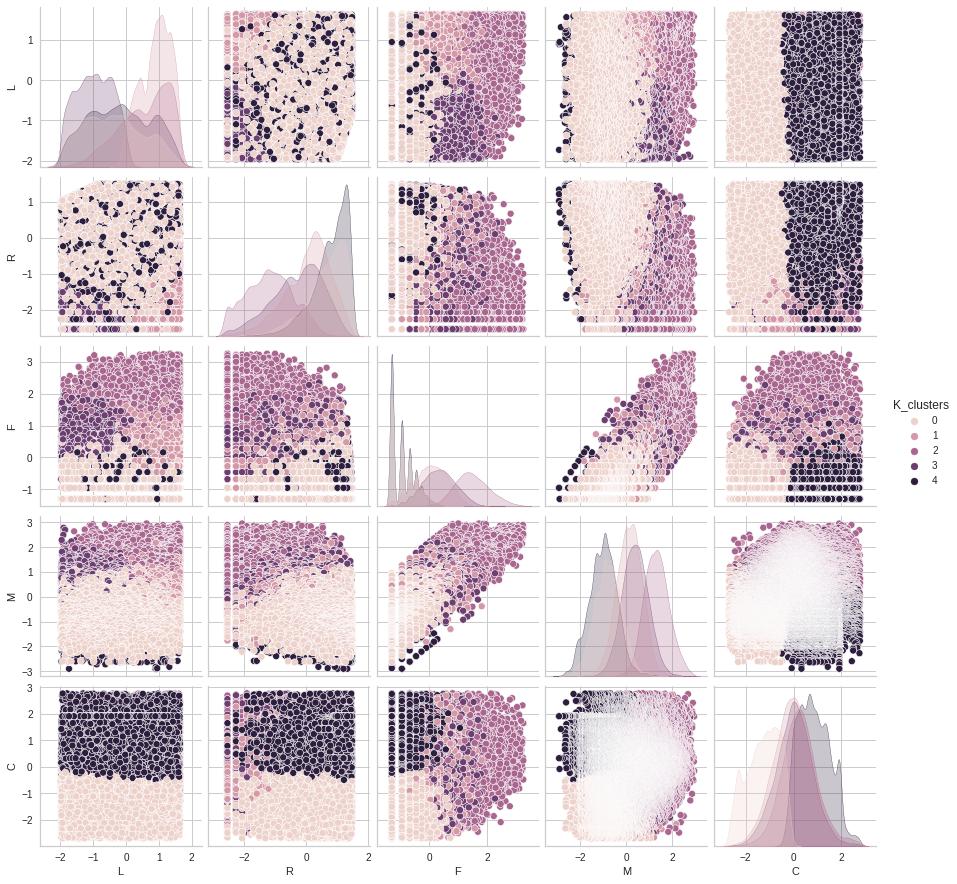

In [ ]:
sns.pairplot(data=df_std_LRFMC, hue='K_clusters')

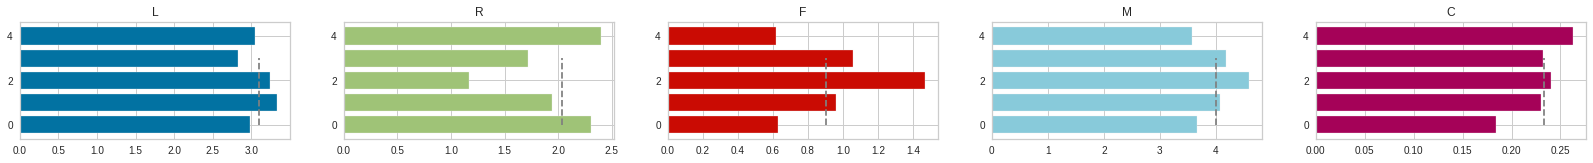

In [ ]:
LRFM=['L','R','F','M','C']
def dist_list(lst):
    plt.figure(figsize=[len(lst)*5,2])
    i = 1
    cl = ['bgrcmykw'[c] for c in range(len('bgrcmykw'))]
    for col in lst:
        ax = plt.subplot(1,len(lst),i)
        ax.vlines(df_IQR_LRFMC[col].median(), ymin=0, ymax=3, color='grey', linestyle='--')
        g = df_IQR_LRFMC.groupby('K_clusters')
        x = g[col].mean().index
        y = g[col].mean().values
        ax.barh(x,y,color=cl[i-1])
        plt.title(col)
        i = i+1

dist_list(LRFM)

After evaluating through visualization and compare it with what we've done through inertia and silhouette score, the number of clusters (k=5) is appropriate. The scatter plot shows the data has been clustered quite well.

K-MEANS

0 = **Hibernating - Low Value Customers/Need Attention**

1 = **Loyal Customers**

2 = **The Champions**

3 = **Potential Loyalists - New Customers/Recent User**

4 = **Hibernating - Price Sensitive Customers**

Using mean/median shows the same characteristic for each cluster.

There are five clusters:

1. Cluster-0 is Customer Group 1
2. Cluster-1 is Customer Group 2
3. Cluster-2 is Customer Group 3
4. Cluster-3 is Customer Group 4
5. Cluster-4 is Customer Group 5

In general, these clusters are formed because there are differences in the value of the LRFMC indicator.

Based on visualization above we can summarize customer characteristic for each group as below:

1. Cluster 0 (Group 1) - **Hibernating - Low Value Customers/Need Attention**

Customer groups who have been members for the medium term but do not frequently use airlines, have low frequency and monetary values and high recency.

2. Cluster 1 (Group 2) - **Loyal Customers**

Customer groups who have been members for the longest period of time and have moderate flight activity, the time span for making flights is not too far away and use airlines quite often.

3. Cluster 2 (Group 3) - **The Campions**

Customer groups that have very high flight activity, often use airlines and with long distances so that they have the potential to generate revenue. This group also has a low recency level, meaning that the time span for each flight is not too far or too long. In addition, the customer has been a member for quite a while.

4. Cluster 3 (Group 4) - **Potential Loyalists - New Customers/Recent User**

A group of new customers who recently used the airline. This can be seen from the time he joined as a member recently and has a low level of recency, besides that the activity often uses airlines and the distance is moderate.

5. Cluster 4 - **Hibernating - Price Sensitive Customers**

New customer groups that have low airline activity and usage. This group has the highest discount rate.

####PCA

CPU times: user 2.55 s, sys: 739 ms, total: 3.29 s
Wall time: 2.51 s


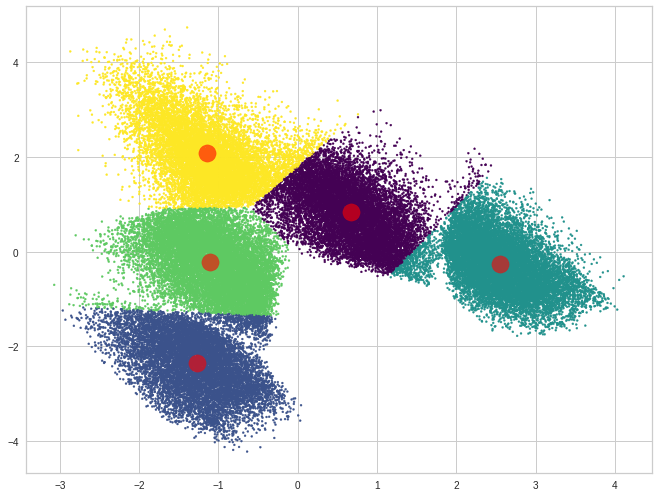

In [ ]:
#Kmeans
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
n_clusters = 5
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(df_std_LRFMC)
kmeans = KMeans(n_clusters= n_clusters, max_iter=600,random_state=150, algorithm = 'auto')

%time fitted = kmeans.fit(Y_sklearn)
prediction = kmeans.predict(Y_sklearn)
df_pred=df_std_LRFMC.assign(cluster = prediction)
targets = [0, 1, 2, 3, 4]
plt.figure(figsize = (10,8))
plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1],c=prediction ,s=4, cmap='viridis')
centers2 = fitted.cluster_centers_
plt.scatter(centers2[:, 0], centers2[:, 1],c='red', s=300, alpha=0.6);

In [ ]:
#Doing PCA to see the visualization

pca = PCA(n_components=2)

pca.fit(df_std_LRFMC)
pcs = pca.transform(df_std_LRFMC)

df_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
df_pca['cluster'] = df_std_LRFMC['K_clusters']
df_pca

,PC 1,PC 2,cluster
0,-0.907323,3.290160,2
1,-1.195257,3.875647,2
2,-0.662803,3.068004,2
3,-1.394734,4.726582,2
4,-1.128632,4.048206,2
...,...,...,...
59969,-0.295198,-3.932096,0
59970,-1.044912,-4.021560,0
59971,-0.471319,-4.126663,0
59972,-0.638124,-4.219442,0


Text(0.5, 1.0, 'Customer Segmentation Based on LRFMC Model')

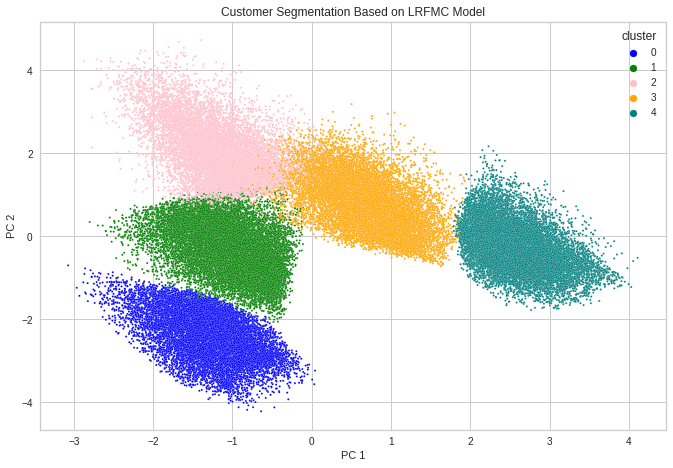

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))

sns.scatterplot(
    x='PC 1', y='PC 2',
    hue='cluster',
    edgecolor='white',
    linestyle='--',
    data=df_pca,
    palette=['blue','green','pink','orange', 'teal'],
    s=4,
    ax=ax
)
plt.title('Customer Segmentation Based on LRFMC Model')

#Evaluation (Insight)

###Customer Value Analysis
Cluster Count

In [ ]:
#Make table summary of missing value count with the percentage

cluster_count = df_IQR_LRFMC['K_clusters'].value_counts().reset_index()
cluster_count.columns = ['cluster', 'count']
cluster_count['percentage'] = round((cluster_count['count']/len(df))*100,2)
cluster_count = cluster_count.sort_values(by=['cluster']).reset_index(drop=True)
cluster_count

,cluster,count,percentage
0,0,10579,16.80
1,1,13617,21.62
2,2,10976,17.43
3,3,12013,19.07
4,4,12789,20.30


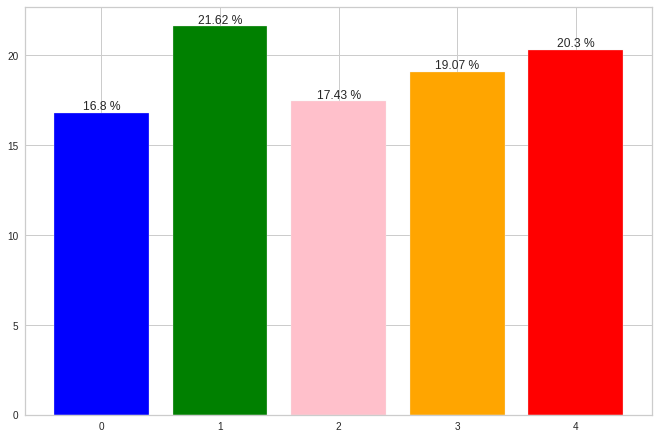

In [ ]:
#Plot in bar chart for better visualization

c = ['blue','green','pink','orange', 'red']
fig, ax = plt.subplots(figsize=(10,7))
bars = plt.bar(x=cluster_count['cluster'], height= cluster_count['percentage'], color = c)

for bar in bars:
  height = bar.get_height()
  label_x_pos = bar.get_x() + bar.get_width() / 2
  ax.text(label_x_pos, height, s=f'{height} %', ha='center',
  va='bottom')

There are 5 clusters (customer segment/group) with the number of customers from each cluster as follows:

* Cluster - 0 | Customer Group 1 : 10579 (16.80 %)
* Cluster - 1 | Customer Group 2 : 13617 (21.62 %)
* Cluster - 2 | Customer Group 3 : 10976 (17.43 %)
* Cluster - 3 | Customer Group 4 : 12013 (19.07 %)
* Cluster - 4 | Customer Group 5 : 12789 (20.30 %)

It can be said that this clustering has a fairly even distribution of the number of customers.

In [ ]:
#Grupby to check mean data - use this for radar chart

avg_cluster_mean = df_std_LRFMC.groupby('K_clusters').mean().reset_index(drop=True)
avg_cluster_mean

,L,R,F,M,C
0,-0.394968,0.609962,-0.873594,-0.785283,-1.278868
1,0.889477,0.037159,0.057425,0.141553,-0.035792
2,0.554273,-1.185786,1.472170,1.321799,0.244894
3,-0.966860,-0.306857,0.327183,0.392967,0.018683
4,-0.187853,0.761800,-0.909312,-1.004676,0.868257


In [ ]:
#Make radar chart

import plotly.graph_objects as go

fig = go.Figure()

for i in range(5):
    fig.add_trace(go.Scatterpolar(r=avg_cluster_mean.loc[i].values.tolist() + avg_cluster_mean.loc[i].values.tolist()[:1],
                                  theta=avg_cluster_mean.columns.tolist() + avg_cluster_mean.columns.tolist()[:1],
                                  name="CLUSTER-%s"%avg_cluster_mean.index[i],
                                  showlegend=True))

fig.update_layout(polar=dict(radialaxis=dict(visible=True, range=[-1.5, 1.5])),title="Cluster - LRFMC")

fig.show()

In [ ]:
#Doing antilog by creating new dataframe df_cluster, and apply the formula on corresponding column

df_cluster = df_IQR_LRFMC.copy()
df_cluster['L'] = 10 ** df_IQR_LRFMC['L'] - 1
df_cluster['R'] = 10 ** df_IQR_LRFMC['R'] - 1
df_cluster['F'] = 10 ** df_IQR_LRFMC['F'] - 1
df_cluster['M'] = 10 ** df_IQR_LRFMC['M'] - 1
df_cluster['C'] = 10 ** df_IQR_LRFMC['C'] - 1
df_cluster

,L,R,F,M,C,K_clusters
0,3333.0,34.0,24.0,189813.0,1.087220,2
1,1168.0,3.0,35.0,201141.0,0.998555,2
2,1206.0,22.0,21.0,185493.0,1.029508,2
3,626.0,1.0,110.0,187588.0,1.015978,2
4,3380.0,15.0,55.0,153868.0,1.146001,2
...,...,...,...,...,...,...
59969,438.0,402.0,2.0,746.0,0.500000,0
59970,1406.0,473.0,2.0,834.0,0.400000,0
59971,374.0,373.0,2.0,746.0,0.425000,0
59972,529.0,498.0,2.0,760.0,0.400000,0


In [ ]:
#Display mean and median for each cluster to get the real value in average and median

display(df_cluster.groupby('K_clusters').agg(['mean','median']))

L                   R                 F         \
                   mean  median        mean median       mean median   
K_clusters                                                             
0           1141.321013   943.0  283.799698  250.0   3.557236    3.0   
1           2232.143130  2224.0  138.436733  105.0   9.198135    8.0   
2           1927.317875  1910.0   25.742529   13.0  32.364523   28.0   
3            718.376176   682.0   94.355282   62.0  11.806793   10.0   
4           1297.704043  1096.0  329.513175  309.0   3.408554    3.0   

                       M                  C            
                    mean   median      mean    median  
K_clusters                                             
0            5534.884488   4646.0  0.530492  0.536471  
1           13775.138577  11958.0  0.700972  0.697147  
2           44995.194880  38265.0  0.741261  0.734629  
3           17923.240406  15181.0  0.708436  0.705758  
4            4490.722887   3867.0  0.834416  0.822886

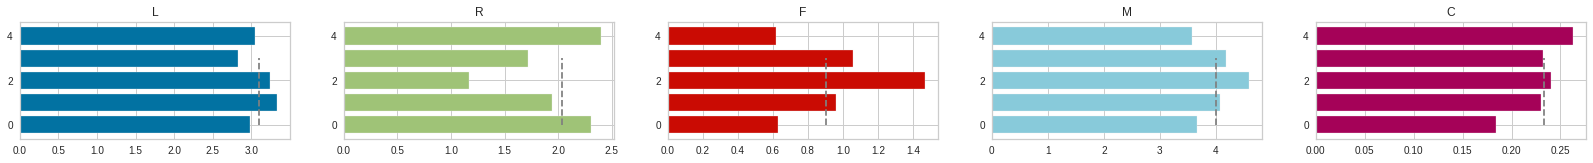

In [ ]:
LRFM=['L','R','F','M','C']
def dist_list(lst):
    plt.figure(figsize=[len(lst)*5,2])
    i = 1
    cl = ['bgrcmykw'[c] for c in range(len('bgrcmykw'))]
    for col in lst:
        ax = plt.subplot(1,len(lst),i)
        ax.vlines(df_IQR_LRFMC[col].median(), ymin=0, ymax=3, color='grey', linestyle='--')
        g = df_IQR_LRFMC.groupby('K_clusters')
        x = g[col].mean().index
        y = g[col].mean().values
        ax.barh(x,y,color=cl[i-1])
        plt.title(col)
        i = i+1

dist_list(LRFM)

K-MEANS

0 = **Hibernating - Low Value Customers/Need Attention**

1 = **Loyal Customers**

2 = **The Champions**

3 = **Potential Loyalists - New Customers/Recent User**

4 = **Hibernating - Price Sensitive Customers**

1. `Cluster 0` - Customer Group 1:
* **Hibernating - Low Value Customers/Need Attention**
* (L) Long time ago, (R) Very long, (F) low frequency, (M) Total trips are not much, (C) Average discount is low.

2. `CLuster 1` - Customer Group 2:
* **Loyal Customers**
* (L) very long, (R) fairly new, (F) moderate frequency, (M) total trips moderate, (C) Average discount is high.

3. `Cluster 2` - Customer Group 3:
* **The Champions**
* (L) Long enough, (R) Very New, (F) High frequency, (M) Total long trip, (C) Average discount is quite high.


4. `Cluster 3` - Customer Group 4:
* **Potential Loyalists - New Customers/Recent User**
(L) Too long ago, (R) nnew, (F) moderate frequency, (M) Total trips are moderate, (C) Average discount is moderate.

5. `Cluster 4` - Customer Group 5:
* 4 = **Hibernating - Price Sensitive Customers**
* (L) Not too long ago, (R) quite long, (F) very low frequency, (M) Total trips are close, (C) Average discount is very high.

#Business Recommendation

1. `Cluster 0` (Group 1) - **Hibernating - Low Value Customers/Need Attention**

Existing customers, but haven't used the airline recently. Treatment is needed so that customers make purchases as soon as possible, or the company will lose the trust of customers.

**Business Recommendation:**
* Send email marketing to customers in this group with the "We Miss You" program and provide special vouchers or discount codes to be used on future flights with a predetermined validity period.

2. `Cluster 1` (Group 2) - **Loyal Customer**

Group of customers who have been using the airline for a long time. Customers are happy with the services provided and do not switch to other alternatives. It is important to provide treatment so that customers feel valued.

**Business Recommendation:**
* Sending a thank you email "Thanks for Flying with Us" and providing a voucher/discount code for the next flight.
* Provide points/rewards for each airline booking that can be redeemed with a discount voucher or affiliate product with the airline.

3. `Cluster 2` (Group 3) - **The Campions**

Often use airlines and with long distances. Can be a significant contributor to company revenue. Customers in this group must be treated kindly and carefully, and it is necessary to make customers feel valued in order to become company loyalists.

**Business Recommendation:**
* Building good relationships with customers through on boarding support such as by providing Flight Booking Assistants.
* Provide souvenirs or merchandise.
* Provides discounts for purchasing more than one flight at a time.
* Provide special discounts/rewards when flying with friends.
* Provide point/reward for each airline booking.

4. `Cluster 3` (Group 4) - **Potential Loyalists - New Customers/Recent User**

Group that is new to using airlines need to be given treatment to become loyal customers in the long term. It is necessary to carry out continuous monitoring to prevent customers from leaving after some time.

**Business Recommendation:**
* Sending a thank you email "Thanks for Flying with Us" and providing a voucher/discount code for the next flight.
* Gives points for each flight.
Give rewards/vouchers/discounts after achieving several flights in a certain period, for example 2 flights in 1 year.

5. `Cluster 4` (Group 5) - **Hibernating - Price Sensitive Customers**

New customer groups with very low consumption can occur for various reasons. It takes personalized treatment with customer demographics and habits.

**Business Recommendation:**
* Send personalized campaigns or promos.
* Sending newsletters to notify discounts and beneficial flight programs to encourage customers to use the airline again.

#References

The following are references in working on this project.

* https://books.google.co.id/books?id=CcH4DwAAQBAJ&pg=PA95&lpg=PA95&dq=chinese+member+airline+data+customer+bp_sum&source=bl&ots=MuNwvzNnN-&sig=ACfU3U0hPyubVpBG7RGuxmQgm9Zn7m2g6g&hl=en&sa=X&ved=2ahUKEwjZsKzHy7LsAhWZaCsKHW9XDW8Q6AEwCHoECAoQAg#v=onepage&q=chinese%20member%20airline%20data%20customer%20bp_sum&f=false
* https://clevertap.com/blog/rfm-analysis/
* https://www.moengage.com/blog/rfm-analysis-using-rfm-segments/